In [2]:
from sklearn.datasets import load_iris
from umap import UMAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
df = load_iris()
X = df.data #array
y = df.target # array

In [4]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
standardized_X = (X - means) / stds

In [5]:
perplexity = 30 # Set to 5-50 in general
um = UMAP(n_components=2, n_neighbors=4, init='pca', min_dist=0.1, metric='euclidean', random_state=919).fit_transform(standardized_X)
df_um = pd.DataFrame(um, columns=['t1', 't2'])

/Users/leo/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


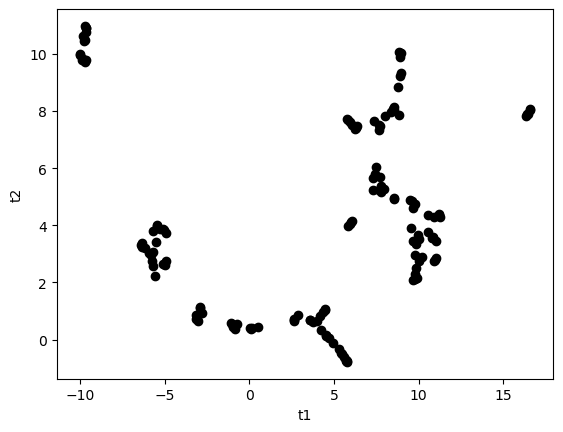

In [7]:
# Plot
plt.scatter(df_um.iloc[:, 0], df_um.iloc[:, 1], c='black')
plt.xlabel(df_um.columns[0])
plt.ylabel(df_um.columns[1])
plt.show()


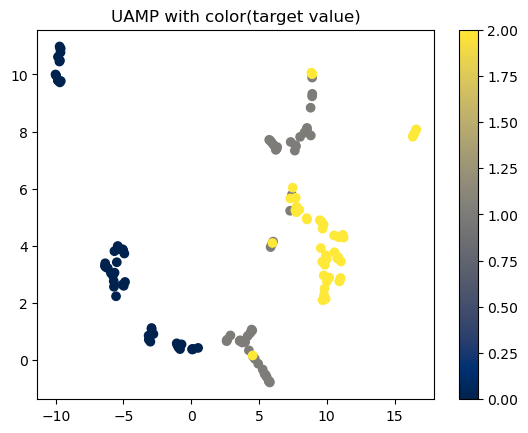

In [8]:
# Color Map with target variable
sc = plt.scatter(df_um.iloc[:,0],df_um.iloc[:,1], vmin=np.min(y), vmax=np.max(y), c=y, cmap=cm.cividis)
plt.colorbar(sc)
plt.title("UAMP with color(target value)")
plt.show()

## Note
Perplexity:
 - データの局所的な特性と全体的な特性のどちらをより考慮するか、そのバランスを表しています
 - perplexityの値は、t-SNEが出力するグラフに混乱させる影響を与えます
 - 元の論文では、「SNEのパフォーマンスはperplexityの変化の影響を受けにくく、一般的には5〜50程度です」と記述されています
 - perplexityの値は、5~50の間が適切だとvan der MaatenとHintonは提唱しています
 - 実のところperplexityは点の数よりも小さくした方がいいのです

*Ref: https://deepage.net/machine_learning/2017/03/08/tsne.html*